In [1]:
data_file_in = "data/t.wav" # <--- CHANGE THIS!!

In [2]:
from receiver import receiver
import matplotlib.pyplot as plt

Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568
Sample rate (wav) =  48000


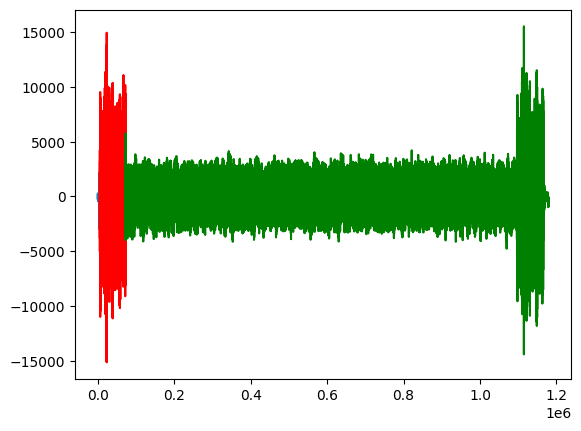

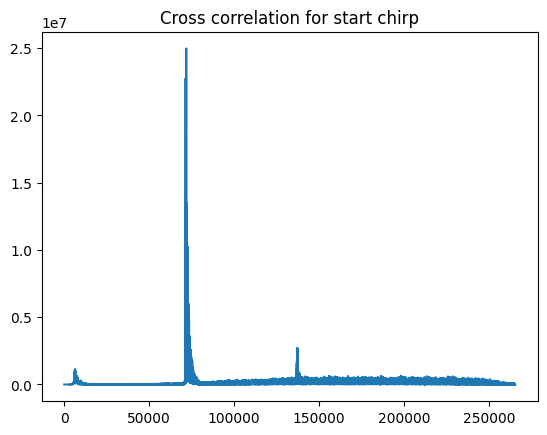

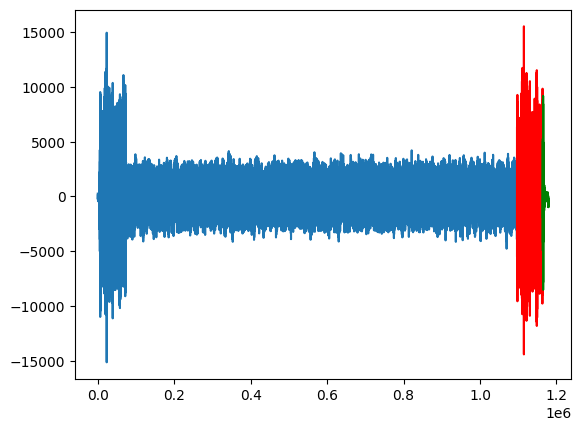

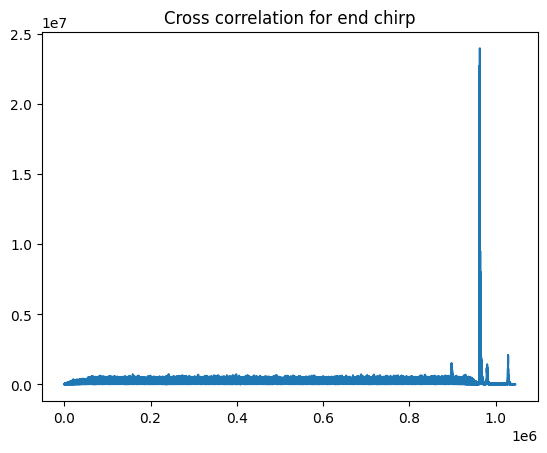

In [3]:
r = receiver()

# entire_data = np.loadtxt('data/benson_testing1.csv', delimiter = ",", dtype = "float")

entire_data = r.read_wav(data_file_in)

### FIND CROSS CORRELATIONS (start and end chirps)

start_index, cross_correlation = r.find_start_index(entire_data)

plt.plot(cross_correlation)
plt.title("Cross correlation for start chirp")
plt.show()

end_index, cross_correlation = r.find_start_index(entire_data, position = "end")

plt.plot(cross_correlation)
plt.title("Cross correlation for end chirp")
plt.show()


In [4]:
### FIND LENGTH AND SEPERATE DATA BLOCK

end_index = end_index - r.ofdm_prefix_size # ???
data_index = r.find_data_index(entire_data, start_index)
data_length = end_index - data_index

print("Data Length:", data_length)

num_symbols = data_length // (r.ofdm_symbol_size + r.ofdm_prefix_size) # Floor division may mean that we loose some data at the end?
data_block = entire_data[data_index : data_index + (num_symbols) * (r.ofdm_symbol_size + r.ofdm_prefix_size)]

r.bits = int(num_symbols * r.c.K)
print("Bits:", r.bits)

data = r.data_block_processing(data_block)

print("Data: ", data[0:100])
print(r.decode_text(data)[0:100])

data_without_header = r.extract_header(data)
r.save_decoded_file(data_without_header, r.bits)

Data Length: 1023982
Bits: 128952
Len of Data_block: 1018880
Number of OFDM Symbols: 199
[ 1.00000000e+00     +0.j         -1.21224439e+05+365617.16337872j
  2.19786903e+05-119548.29162414j ... -4.85248462e+04+145481.29698134j
  2.19786903e+05+119548.29162414j -1.21224439e+05-365617.16337872j]
Ideal [[     0.            +0.j         -26223.35458708 -1225.4868499j
  -15201.62251919 -9771.20376718j ...  28844.9193904 +40938.52591164j
  -15201.62251919 +9771.20376718j -26223.35458708 +1225.4868499j ]
 [     0.            +0.j         -26223.35458708 -1225.4868499j
  -15201.62251919 -9771.20376718j ...  28844.9193904 +40938.52591164j
  -15201.62251919 +9771.20376718j -26223.35458708 +1225.4868499j ]
 [     0.            +0.j         -26223.35458708 -1225.4868499j
  -15201.62251919 -9771.20376718j ...  28844.9193904 +40938.52591164j
  -15201.62251919 +9771.20376718j -26223.35458708 +1225.4868499j ]
 [     0.            +0.j         -26223.35458708 -1225.4868499j
  -15201.62251919 -9771.2037